# Train Model Based On VGG16 For 11 Classes

In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential, Model 
from keras.layers import Dropout, Flatten, Dense, GlobalAveragePooling2D
from keras import backend as k 
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, TensorBoard, EarlyStopping

Using TensorFlow backend.


In [3]:
img_width, img_height = 150, 150
train_data_dir = './training'
validation_data_dir = './validation'
nb_train_samples = 9866
nb_validation_samples = 3430
epochs = 40
batch_size = 32

In [4]:
model = applications.VGG16(weights = "imagenet", include_top = False, input_shape = (img_width, img_height, 3))

In [5]:
for layer in model.layers[:5]:
    layer.trainable = False

In [6]:
x = model.output
x = Flatten()(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(1024, activation = "relu")(x)
predictions = Dense(11, activation = "softmax")(x)

In [7]:
model_final = Model(input = model.input, output = predictions)

In [8]:
model_final.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr = 0.0001, momentum = 0.9), metrics = ["accuracy"])

In [9]:
train_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range = 0.3,
rotation_range = 30)

In [10]:
test_datagen = ImageDataGenerator(
rescale = 1./255,
horizontal_flip = True,
fill_mode = "nearest",
zoom_range = 0.3,
width_shift_range = 0.3,
height_shift_range = 0.3,
rotation_range = 30)

In [11]:
train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "categorical")

Found 9866 images belonging to 11 classes.


In [12]:
validation_generator = test_datagen.flow_from_directory(
validation_data_dir,
target_size = (img_height, img_width),
class_mode = "categorical")

Found 3430 images belonging to 11 classes.


In [13]:
checkpoint = ModelCheckpoint("vgg16_full.h5", monitor = 'val_acc', verbose = 1, save_best_only = True, save_weights_only = False, mode = 'auto', period = 1)
early = EarlyStopping(monitor = 'val_acc', min_delta = 0, patience = 10, verbose = 1, mode = 'auto')

In [14]:
model_final.fit_generator(
train_generator,
samples_per_epoch = nb_train_samples,
nb_epoch = epochs,
validation_data = validation_generator,
nb_val_samples = nb_validation_samples, callbacks = [checkpoint, early])

Epoch 1/40
9866/9866 [==============================] - 549s - loss: 2.2342 - acc: 0.2050 - val_loss: 1.9319 - val_acc: 0.3321
Epoch 2/40
9866/9866 [==============================] - 529s - loss: 1.8527 - acc: 0.3495 - val_loss: 1.5548 - val_acc: 0.4574
Epoch 3/40
9866/9866 [==============================] - 529s - loss: 1.5446 - acc: 0.4616 - val_loss: 1.3431 - val_acc: 0.5292
Epoch 4/40
9866/9866 [==============================] - 529s - loss: 1.3784 - acc: 0.5282 - val_loss: 1.1661 - val_acc: 0.6055
Epoch 5/40
9866/9866 [==============================] - 528s - loss: 1.2453 - acc: 0.5718 - val_loss: 1.1885 - val_acc: 0.5985
Epoch 6/40
9866/9866 [==============================] - 530s - loss: 1.1779 - acc: 0.6046 - val_loss: 1.0842 - val_acc: 0.6452
Epoch 7/40
9866/9866 [==============================] - 529s - loss: 1.0735 - acc: 0.6387 - val_loss: 0.9841 - val_acc: 0.6767
Epoch 8/40
9866/9866 [==============================] - 528s - loss: 1.0322 - acc: 0.6572 - val_loss: 0.9565 - 

9866/9866 [==============================] - 529s - loss: 0.5031 - acc: 0.8335 - val_loss: 0.6355 - val_acc: 0.7983
Epoch 32/40
9866/9866 [==============================] - 528s - loss: 0.5063 - acc: 0.8325 - val_loss: 0.6548 - val_acc: 0.7953
Epoch 33/40
9866/9866 [==============================] - 529s - loss: 0.4959 - acc: 0.8373 - val_loss: 0.6557 - val_acc: 0.7924
Epoch 34/40
9866/9866 [==============================] - 528s - loss: 0.4768 - acc: 0.8418 - val_loss: 0.6711 - val_acc: 0.7872
Epoch 35/40
9866/9866 [==============================] - 529s - loss: 0.4715 - acc: 0.8488 - val_loss: 0.6395 - val_acc: 0.8041
Epoch 36/40
9866/9866 [==============================] - 529s - loss: 0.4789 - acc: 0.8448 - val_loss: 0.6168 - val_acc: 0.8067
Epoch 37/40
9866/9866 [==============================] - 528s - loss: 0.4622 - acc: 0.8468 - val_loss: 0.6261 - val_acc: 0.7994
Epoch 38/40
9866/9866 [==============================] - 528s - loss: 0.4534 - acc: 0.8507 - val_loss: 0.6368 - val_

# Load Model and Find Nearest Neighbors

In [1]:
from keras.models import load_model, Model
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

%matplotlib inline

Using TensorFlow backend.


In [2]:
saved_model = load_model('vgg16_full.h5')
out = saved_model.layers[-2].output
inp = saved_model.input
mod = Model(inp, out)

In [6]:
img = cv2.imread("/home/ubuntu/A_samoyed_sushi_cosplay.jpg")

In [8]:
img_resized = np.array([cv2.resize(img, (150, 150))])

In [9]:
prob_array = mod.predict(img_resized)

In [10]:
prob_array

array([[  4.09213591,   4.6219039 ,   0.        , ...,   0.        ,
         25.33102036,  23.1995182 ]], dtype=float32)

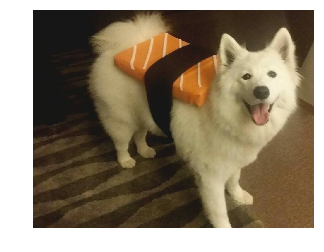

In [17]:
plt.axis("off")
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

In [28]:
classes = {0: "bread", 1: "dairy", 2: "dessert", 4: "egg", 5: "fried", 6: "meat", 7: "noodles", 8: "rice", 9: "salad", 10: "seafood", 11: "soup"}

In [32]:
sample = mpimg.imread("/home/ubuntu/salmon_sushi.jpg")

In [33]:
sample_resized = np.array([cv2.resize(sample, (150, 150))])

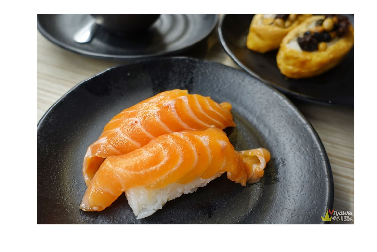

In [34]:
plt.axis("off")
plt.imshow(sample)
plt.show()

In [21]:
prob_array2 = mod.predict(sample_resized)

In [22]:
cosine_similarity(prob_array, prob_array2)

array([[ 0.66155887]], dtype=float32)

In [26]:
probability = sorted(dict(zip(classes.values(), prob_array[0])).items(), key = lambda x: x[1], reverse = True)

In [27]:
probability

[('salad', 1.0),
 ('rice', 0.0),
 ('seafood', 0.0),
 ('meat', 0.0),
 ('bread', 0.0),
 ('noodles', 0.0),
 ('egg', 0.0),
 ('dairy', 0.0),
 ('fried', 0.0),
 ('dessert', 0.0),
 ('soup', 0.0)]

In [28]:
prediction = classes[np.argmax(saved_model.predict(sample_resized))]


In [43]:
combo = mpimg.imread("/home/ubuntu/combo.jpg")

In [44]:
combo_resized = np.array([cv2.resize(combo, (150, 150))])

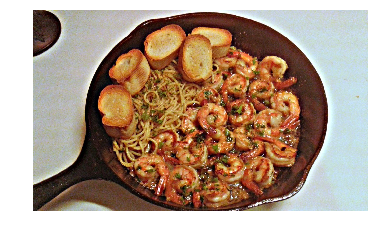

In [46]:
plt.axis("off")
plt.imshow(combo)
plt.show()

In [47]:
saved_model.predict(combo_resized)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.]], dtype=float32)

In [49]:
print(sorted(dict(zip(classes.values(), saved_model.predict(combo_resized)[0])).items(), key = lambda x: x[1], reverse = True))

[('seafood', 1.0), ('noodles', 0.0), ('soup', 0.0), ('rice', 0.0), ('salad', 0.0), ('dessert', 0.0), ('egg', 0.0), ('bread', 0.0), ('dairy', 0.0), ('fried', 0.0), ('meat', 0.0)]
